## We are going to use deciison trees to now make a prediction about the titanic deaths instead of regression

In [18]:
import os
import pandas as pd
from sklearn import tree
from sklearn.tree import export_text

In [6]:
df = pd.read_csv("data/titanic_train.csv")

In [7]:
print(df.head())

   passenger_id  pclass                                               name  \
0          1216       3                                 Smyth, Miss. Julia   
1           699       3                                    Cacic, Mr. Luka   
2          1267       3  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...   
3           449       2              Hocking, Mrs. Elizabeth (Eliza Needs)   
4           576       2                                    Veal, Mr. James   

      sex   age  sibsp  parch  ticket     fare cabin embarked boat  body  \
0  female   NaN      0      0  335432   7.7333   NaN        Q   13   NaN   
1    male  38.0      0      0  315089   8.6625   NaN        S  NaN   NaN   
2  female  30.0      1      1  345773  24.1500   NaN        S  NaN   NaN   
3  female  54.0      1      3   29105  23.0000   NaN        S    4   NaN   
4    male  40.0      0      0   28221  13.0000   NaN        S  NaN   NaN   

                  home.dest  survived  
0                       NaN       

In [11]:
# will use columns sec, age, pclass, and sibsp

columns = ["sex", "age", "pclass", "sibsp"]

# need to clean the data a bit, make sex columns binary
df.loc[df["sex"]=="male", "sex"] = 0
df.loc[df["sex"]=="female", "sex"] = 1

df["age"] = df["age"].fillna(df["age"].median())

In [12]:
x = df[columns]
y = df["survived"]

In [15]:
# create the decision tree

clf = tree.DecisionTreeClassifier()

In [16]:
clf.fit(x, y)

DecisionTreeClassifier()

alue = [4, 0]'),
 Text(105.64733303451368, 62.943157894736856, 'X[3] <= 0.5\ngini = 0.375\nsamples = 24\nvalue = [18, 6]'),
 Text(100.84518153294488, 51.49894736842106, 'X[1] <= 20.5\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(98.44410578216048, 40.05473684210526, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(103.24625728372928, 40.05473684210526, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(110.44948453608248, 51.49894736842106, 'X[3] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(108.04840878529808, 40.05473684210526, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(112.85056028686688, 40.05473684210526, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(115.25163603765128, 74.38736842105263, 'X[1] <= 23.5\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(112.85056028686688, 62.943157894736856, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(117.6527117884357, 62.943157894736856, 'X[3] <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 T

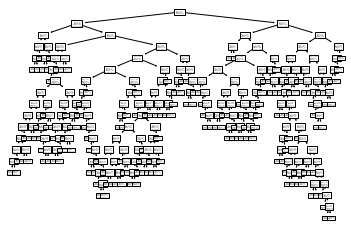

In [17]:
# plot the tree in a graph

tree.plot_tree(clf)

In [22]:
# sort of visualize how the tree is structured

print(export_text(clf, feature_names=columns))

|--- sex <= 0.50
|   |--- age <= 9.50
|   |   |--- sibsp <= 2.00
|   |   |   |--- age <= 0.79
|   |   |   |   |--- age <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  0.71
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  0.79
|   |   |   |   |--- class: 1
|   |   |--- sibsp >  2.00
|   |   |   |--- age <= 3.50
|   |   |   |   |--- age <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  2.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  3.50
|   |   |   |   |--- class: 0
|   |--- age >  9.50
|   |   |--- pclass <= 1.50
|   |   |   |--- age <= 53.50
|   |   |   |   |--- age <= 50.50
|   |   |   |   |   |--- age <= 15.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  15.00
|   |   |   |   |   |   |--- age <= 36.50
|   |   |   |   |   |   |   |--- age <= 33.75
|   |   |   |   |   |   |   |   |--- sibsp <= 0.50
|   |   |   |   |   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |   |   |   |   |---

In [23]:
print(clf.score(x, y))

0.9011764705882352


In [25]:
test = pd.read_csv("data/titanic_test.csv")
print(test.head())

   passenger_id  pclass                            name   sex   age  sibsp  \
0           295       1     Thayer, Mr. John Borland Jr  male  17.0      0   
1          1150       3        Risien, Mr. Samuel Beard  male   NaN      0   
2            89       1          Davidson, Mr. Thornton  male  31.0      1   
3          1063       3  Nirva, Mr. Iisakki Antino Aijo  male  41.0      0   
4          1020       3              Minkoff, Mr. Lazar  male  21.0      0   

   parch            ticket      fare cabin embarked boat  body  \
0      2             17421  110.8833   C70        C    B   NaN   
1      0            364498   14.5000   NaN        S  NaN   NaN   
2      0        F.C. 12750   52.0000   B71        S  NaN   NaN   
3      0  SOTON/O2 3101272    7.1250   NaN        S  NaN   NaN   
4      0            349211    7.8958   NaN        S  NaN   NaN   

             home.dest  
0        Haverford, PA  
1                  NaN  
2         Montreal, PQ  
3  Finland Sudbury, ON  
4        

In [30]:
# need to clean the data a bit, make sex columns binary
test.loc[test["sex"]=="male", "sex"] = 0
test.loc[test["sex"]=="female", "sex"] = 1

test["age"] = test["age"].fillna(test["age"].median())

In [31]:
x_test = test[columns]

In [32]:
pred = clf.predict(x_test)
print(pred)

[0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1
 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0]


In [36]:
dataset = pd.DataFrame(list(zip(test["passenger_id"].to_list(), pred.tolist())), columns=["passenger_id", "survived"])

In [37]:
print(dataset.head())

   passenger_id  survived
0           295         0
1          1150         0
2            89         1
3          1063         0
4          1020         0


In [39]:
os.chdir("C:/Users/ab/Documents/GitHub/data-science-lectures-monte/submissions")
dataset.to_csv("submission_decision_trees.csv", index=False)

## The result of all this shows that this data has been "Overfitted", which means that we need another "validation set" along with the "test set" to make sure the model isn't lying to us